# **MINOR PROJECT**

---

In [ ]:
!wget https://www.dropbox.com/s/jx2a1i9kdxo1i4b/diabetes.csv

--2023-07-01 10:32:19--  https://www.dropbox.com/s/jx2a1i9kdxo1i4b/diabetes.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/jx2a1i9kdxo1i4b/diabetes.csv [following]
--2023-07-01 10:32:20--  https://www.dropbox.com/s/raw/jx2a1i9kdxo1i4b/diabetes.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5977418ce65f37208e18dc905c.dl.dropboxusercontent.com/cd/0/inline/B_DWdylovTVJYvtJqCjrQnDw7ueQlu89w9CxD5bD4Cka-hgKoO5X83RBJYprdYCbdFGs4exCkDadmLw_6ORwzE2QX6DdQTLR-gqk1egy6fFbOhgWNoImlUyrT1BiecHbXTdnvz0OCLob0dC8GxJi49Hex2FWGC-noqo3SMhN-E0Mag/file# [following]
--2023-07-01 10:32:20--  https://uc5977418ce65f37208e18dc905c.dl.dropboxusercontent.com/cd/0/inline/B_DWdylovTVJYvtJqCjrQnDw7ueQlu89w9CxD5bD4Cka-hgKoO5X83RBJYprdYCbdFGs4exCkDadm

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data= pd.read_csv('diabetes.csv')

In [ ]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.shape

(768, 9)

###TASK 1

Q1) What is the distribution of diabetes status in the dataset? How many individuals are diagnosed with diabetes and how many are not?

In [ ]:
data['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
#check how many individuals are diagnosed with diabetes and how many are not
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
#check distribution in percentage values
data['Outcome'].value_counts(normalize=True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

Summarizing:

We can see that there are 500 non-diabetic and 268 diabetic people in this dataset.

The distribution of diabetes status thus is, 65% people do not have diabetes and 34% people have diabetes.

---

Q2) Is there any relationship between glucose levels and the presence of diabetes? Can you compare the mean glucose levels for individuals with and without diabetes and determine if there is a significant difference using a hypothesis test?

In [ ]:
#mean of the glucose level of all individuals without diabetes
data[data['Outcome']==0]['Glucose'].mean()

109.98

In [ ]:
#mean of the glucose level of all individuals with diabetes
data[data['Outcome']==1]['Glucose'].mean()

141.25746268656715

In [ ]:
from scipy import stats
# split the dataset into groups of diabetes and no diabetes
gl_wd = data[data['Outcome'] == 1]['Glucose']
gl_wod = data[data['Outcome'] == 0]['Glucose']
# perform independent t-test
t_statistic, p_value = stats.ttest_ind(gl_wd, gl_wod)
# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 14.600060005973894
P-Value: 8.935431645289913e-43


Yes, there is a relationship between glucose levels and presence of diabetes.

For individuals with glucose levels less than 99, they are not diabetic. For individuals with glucose levels between 100-125, they are pre-diabetic; but here, in this dataset, we don't define any outcome to be pre-diabetic, so the outcomes here are based on other factors. For individuals with glucose levels more than 126, they have diabetes


---



Q3) Analyze the distribution of skin thickness and blood pressure among individuals with and without diabetes. Are there any significant differences or patterns in skin thickness values and in the blood pressure values between the two groups?

In [ ]:
#individuals without diabetes
st_wod=data[data['Outcome']==0]
#individuals with diabetes
st_wd= data[data['Outcome']==1]

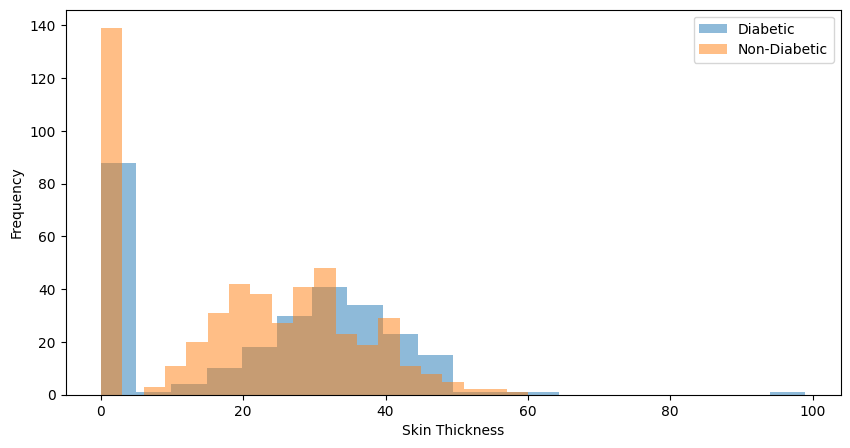

In [ ]:
#distribution of values of skin thickenss among individuals with and without diabetes
plt.figure(figsize=(10, 5))
plt.hist(st_wd['SkinThickness'], bins=20, alpha=0.5, label='Diabetic')
plt.hist(st_wod['SkinThickness'], bins=20, alpha=0.5, label='Non-Diabetic')
plt.xlabel('Skin Thickness')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
#blood pressure of individuals without diabetes
bp_wod= data[data['Outcome']==0]['BloodPressure']


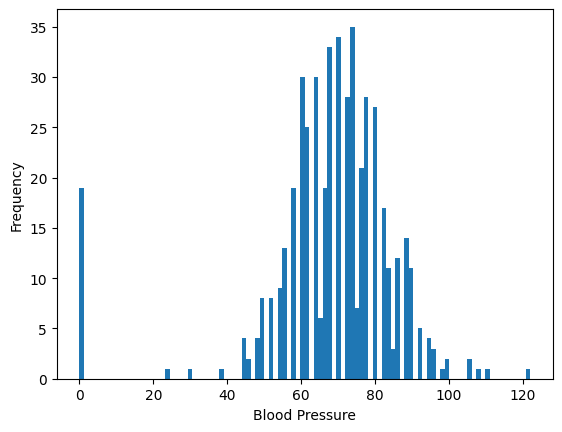

In [ ]:
#distribution of blood pressure of above
plt.hist(bp_wod, bins=100)
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#blood pressure of individuals with diabetes
bp_wd= data[data['Outcome']==1]['BloodPressure']

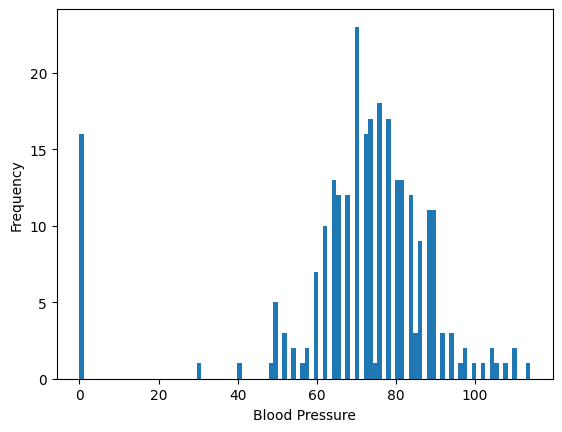

In [ ]:
#distribution of blood pressure of above
plt.hist(bp_wd, bins=100)
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.show()

As we can see, there are differences in the skin thickness and blood pressure of individuals with and without diabetes.

---

Q4) Can you visualize the distribution of body mass index (BMI) for individuals with and without diabetes using a suitable plot, such as a boxplot or histogram? Are there any noticeable differences in BMI between the two groups?

In [ ]:
#BMI of individuals without diabetes
bmi_wod= data[data['Outcome']==0]['BMI']

In [ ]:
#BMI of individuals with diabetes
bmi_wd= data[data['Outcome']==1]['BMI']

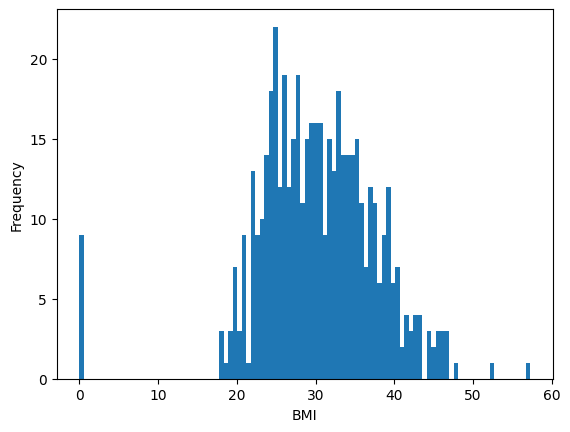

In [ ]:
#histogram plot of BMI of individuals without diabetes
plt.hist(bmi_wod, bins=100)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

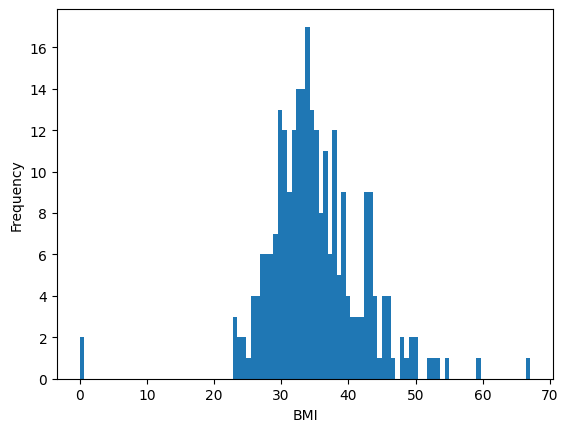

In [ ]:
#histogram plot of BMI of individuals with diabetes
plt.hist(bmi_wd, bins=100)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

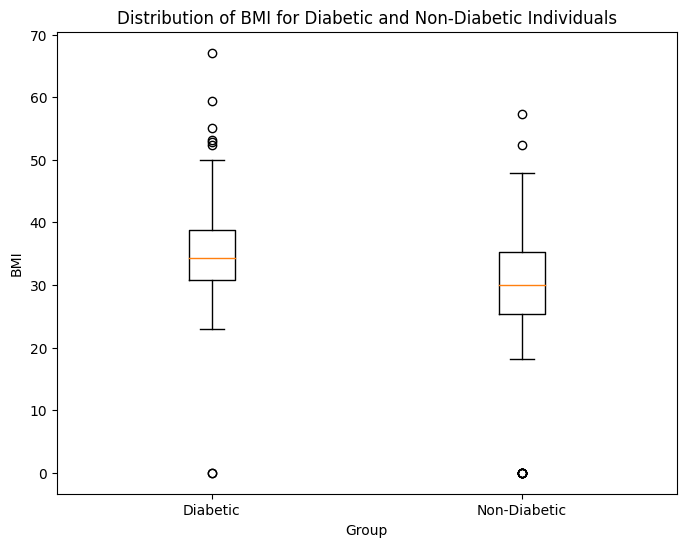

In [ ]:
#box plot of the above
diabetic_group = data[data['Outcome'] == 1]
non_diabetic_group = data[data['Outcome'] == 0]
# plotting the distribution of BMI using a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot([diabetic_group['BMI'], non_diabetic_group['BMI']], labels=['Diabetic', 'Non-Diabetic'])
plt.xlabel('Group')
plt.ylabel('BMI')
plt.title('Distribution of BMI for Diabetic and Non-Diabetic Individuals')
plt.show()

Yes, there are noticeable differences in BMI between the two groups. BMI for individuals without diabetes is somewhere between 20-30, whereas BMI for individuals with diabetes is between 30-40.

---

Q5) What is the average age of individuals with diabetes compared to those without diabetes? Can you calculate and compare the mean ages for the two groups and analyze if there is a significant difference?

In [ ]:
#Average/ Mean age of individuals without diabetes
data[data['Outcome']==0]['Age'].mean()

31.19

In [ ]:
#Average/Mean age of individuals with diabetes
data[data['Outcome']==1]['Age'].mean()

37.06716417910448

As we can see, there is a difference between the mean ages of the groups of individuals with diabetes compared to those without diabetes.

The difference of age is 5.877

###TASK 2

In [ ]:
data.isnull().values.any()

False

In [ ]:
#Feature Engineering
feature_names= data.columns[ :8]
feature_names

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

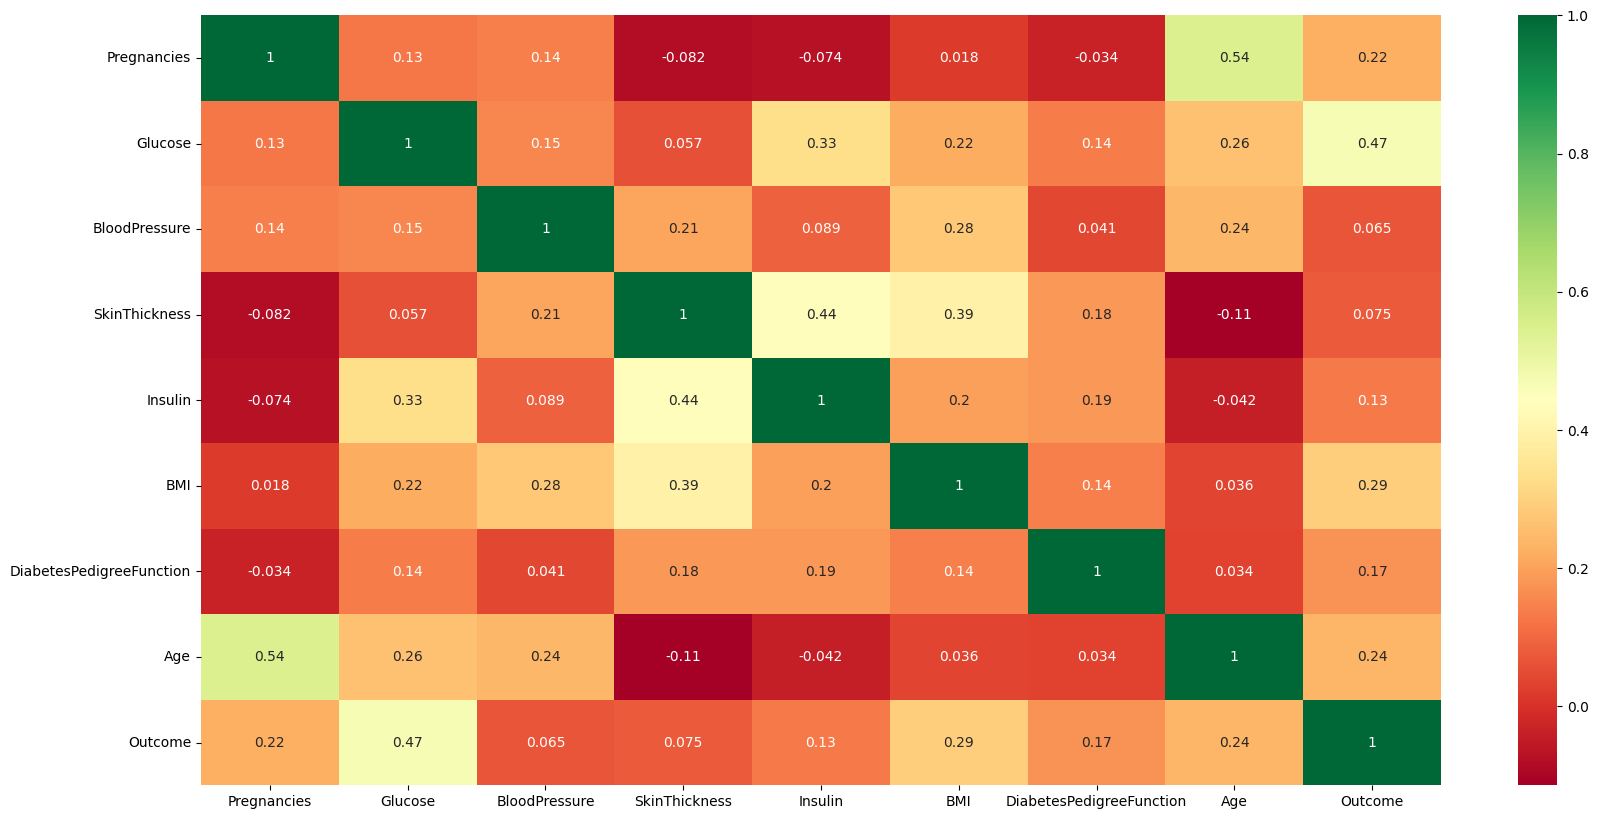

In [ ]:
#heat map for the above dataset- Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt
corrmat= data.corr()
top_corr_features= corrmat.index
plt.figure(figsize=(20,10))
g= sns.heatmap(data[top_corr_features].corr(), annot=True, cmap= "RdYlGn")

In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
feature_columns= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class= ['Outcome']

In [ ]:
X= data[feature_columns].values
Y= data[predicted_class].values

In [ ]:
#Splitting the data into training and testing (80/20)
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.20, random_state=42)

In [ ]:
#Logistic Regression classifier is required
from sklearn.linear_model import LogisticRegression

In [ ]:
model= LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

In [ ]:
from sklearn.model_selection import GridSearchCV

c_values= list(np.arange(1,100))
param_grid= [
    {
        'C': c_values,
        'penalty': ['l1'],
        'solver': ['liblinear'],
        'multi_class': ['ovr'],
        'random_state': ['42']
    },
    {
        'C': c_values,
        'penalty': ['l2'],
        'solver': ['liblinear', 'newton-cg', 'lbfgs'],
        'multi_class': ['ovr'],
        'random_state': [42]
    }
]
grid= GridSearchCV(
    LogisticRegression(),
    param_grid,
    scoring= 'f1'
)
grid.fit(X,Y)
#Best LogisticRegression parameters
print(grid.best_params_)
#Best score for LogisticRegression with best parameters
print('Best score: {:.2f}%'.format(grid.best_score_*100))

{'C': 98, 'multi_class': 'ovr', 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs'}
Best score: 64.25%


In [ ]:
#Model learning
log_reg= LogisticRegression(
    #Parameters based on GridSearchCV result
    C=1,
    multi_class= 'ovr',
    penalty= 'l2',
    solver= 'newton-cg',
    random_state=42
)
log_reg.fit(X_train, Y_train)
log_reg_predict = log_reg.predict(X_test)
log_reg_predict_proba= log_reg.predict_proba(X_test)[:, 1]

In [ ]:
#Model evaluation
print('Accuracy: {:.2f}%'.format(accuracy_score(Y_test, log_reg_predict)*100))
print('AUC: {:.2f}%'.format(roc_auc_score(Y_test, log_reg_predict_proba)*100))
print('Classification report: \n\n', classification_report(Y_test, log_reg_predict))
print('Training set score: {:.2f}%'.format(log_reg.score(X_train, Y_train)*100))
print('Testin set score: {:.2f}%'.format(log_reg.score(X_test, Y_test)*100))

Accuracy: 74.68%
AUC: 81.29%
Classification report: 

               precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

Training set score: 77.04%
Testin set score: 74.68%


*CONCLUSION*


This dataset required Logistic Regression concepts.
Accuracy of this dataset is around 74%.